In [1]:
# NOTE: The following is awful and definitely needs to be changed
%cd ~/MGGG/VoteKit/
from src.votekit.ballot_generator import ImpartialCulture
#from votekit.pref_profile import PreferenceProfile
import matplotlib.pyplot as plt
from math import factorial

/home/willithg/MGGG/VoteKit


In [2]:
## setup the classes

n_cands = 4
cands = [chr(ord('a')+i) for i in range(n_cands)]
print("candidates: ", cands)

ic = ImpartialCulture(candidates=cands)

candidates:  ['a', 'b', 'c', 'd']


In [4]:
## Collect the distribution for the np-optimized method (shuffles the list of cands in place k times)
num_ballots = int(10e4)
bals_MCMC = ic.generate_profile_MCMC_optimized(num_ballots)
bals_NP = ic.generate_profile_IC_optimized(num_ballots)


Text(0, 0.5, 'Deviation from uniform')

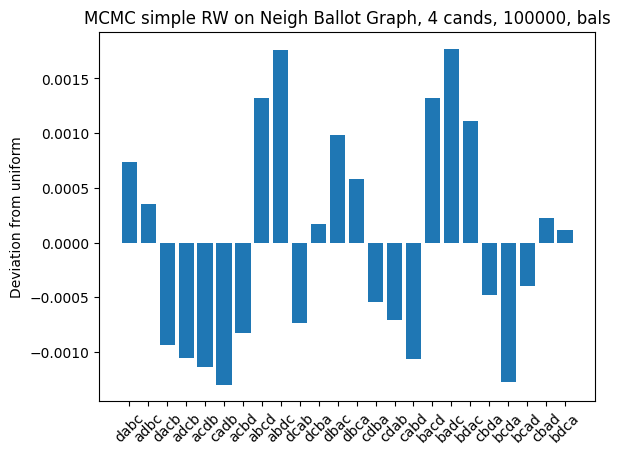

In [5]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_MCMC.ballots]

total_weight_MCMC = sum(bal_weights_MCMC)
ev = 1/factorial(n_cands)
plt.bar(x = bal_labels_MCMC, height = [w/total_weight_MCMC - ev for w in bal_weights_MCMC])
plt.xticks(rotation=45)
plt.title(f"MCMC simple RW on Neigh Ballot Graph, {n_cands} cands, {num_ballots}, bals")
plt.ylabel("Deviation from uniform")

Text(0, 0.5, 'Deviation from uniform')

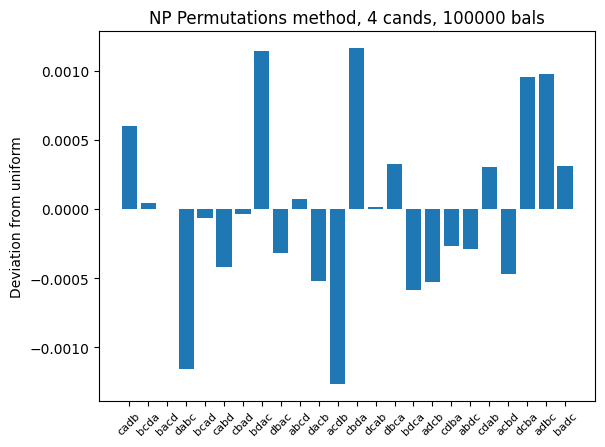

In [6]:
ballot_rankings_NP = [bal.ranking for bal in bals_NP.ballots]
bal_labels_NP = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_NP]
bal_weights_NP = [int(bal.weight) for bal in bals_NP.ballots]

total_weight_NP = sum(bal_weights_NP)
ev = 1/factorial(n_cands)
plt.bar(x = bal_labels_NP, height = [w/total_weight_NP - ev for w in bal_weights_NP])
plt.xticks(rotation=45, fontsize=8)
#plt.tight_layout()
plt.title(f"NP Permutations method, {n_cands} cands, {num_ballots} bals")
plt.ylabel("Deviation from uniform")

In [ ]:
# Compare deviate statistics
# TODO: this would be interesting to re-run as a heatmap
total_weight_NP = sum(bal_weights_NP)
total_weight_MCMC = sum(bal_weights_MCMC)
ev = 1/factorial(n_cands)
deviation_from_uniform_NP = [w / total_weight_NP - ev for w in bal_weights_NP]
deviation_from_uniform_MCMC = [w / total_weight_MCMC - ev for w in bal_weights_MCMC]

print("num cands =", n_cands)
print("num ballots =", num_ballots)
print("Avg deviation from uniform: ")
print("MCMC: ", sum(deviation_from_uniform_MCMC)/len(deviation_from_uniform_MCMC))
print("NP: ", sum(deviation_from_uniform_NP)/len(deviation_from_uniform_NP))

num cands = 4
num ballots = 100000
Avg deviation from uniform: 
MCMC:  2.6020852139652106e-18
NP:  2.023844055306275e-18


In [ ]:
## Run stats
k = int(10e3) 
n = 15

dummy_cands = [chr(ord('a')+i) for i in range(n)] 
ic_bench = ImpartialCulture(candidates=dummy_cands)

print(f"Runtimes for {k} ballots and {n} candidates")
print("MCMC: ")
%timeit ic_bench.generate_profile_MCMC_optimized(k)
print("NP: ")
%timeit ic_bench.generate_profile_IC_optimized(k)

Runtimes for 10000 ballots and 4 candidates
MCMC: 
648 ms ± 228 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
NP: 
540 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Memory overhead stats
import tracemalloc

k = int(10e3) 
n = 5

dummy_cands = [chr(ord('a')+i) for i in range(n)] 
ic_bench = ImpartialCulture(candidates=dummy_cands)

tracemalloc.start()
ic_bench.generate_profile_MCMC_optimized(k)
snap1 = tracemalloc.take_snapshot()

ic_bench.generate_profile_IC_optimized(k)
snap2 = tracemalloc.take_snapshot()

tracemalloc.stop()

top_stats_1 = snap1.statistics("lineno")
top_stats_2 = snap2.statistics("lineno")
how_many_to_display = 50

'''
# TODO: change the save directory
with open("mem_usage.txt", "w") as f:
    f.write(f"[ Top {how_many_to_display} memory consumers MCMC ]\n")
    for stat in top_stats_1[:how_many_to_display]:
        f.write(f"{stat}\n")
    # Detailed traceback for the top memory consumer
    f.write("\n[ Detailed traceback for the top memory consumer ]\n")
    for stat in top_stats_1[:1]:
        f.write('\n'.join(stat.traceback.format()) + '\n')

    f.write("\n[ Top 50 memory consumers NP ]\n")
    for stat in top_stats_2[:how_many_to_display]:
        f.write(f"{stat}\n")
    f.write("\n[ Detailed traceback for the top memory consumer ]\n")
    for stat in top_stats_2[:1]:
        f.write('\n'.join(stat.traceback.format()) + '\n')
'''

In [8]:
# Memory overhead stats
import tracemalloc

k = int(10e3) 
n = 5

dummy_cands = [chr(ord('a')+i) for i in range(n)] 
ic_bench = ImpartialCulture(candidates=dummy_cands)

tracemalloc.start()
ic_bench.generate_profile_MCMC_optimized(k)
first_size, first_peak = tracemalloc.get_traced_memory()
tracemalloc.reset_peak()


ic_bench.generate_profile_IC_optimized(k)
second_size, second_peak = tracemalloc.get_traced_memory()

tracemalloc.stop()

bits_to_kb = 1/8000
print(f"memory stats with {k} ballots and {n} candidates")
print(f"{first_size=}, first_peak={first_peak}")
print(f"{second_size=}, {second_peak=}")

print(f"diff MCMC: {(first_peak-first_size)*bits_to_kb}kb")
print(f"diff NP: {(second_peak-second_size)*bits_to_kb}kb")

memory stats with 10000 ballots and 5 candidates
first_size=17047, first_peak=1782030
second_size=21753, second_peak=2942834
diff MCMC: 220.622875kb
diff NP: 365.135125kb
